# 讀標註完的

In [1]:
from os import listdir
from os.path import isfile, isdir, join
import json 
path='./TrainData/labeled/'

files = listdir(path)

all_path=[]
for f in files:
    if f.split('.')[-1]!='png':
        continue
    fullpath=path+f
    if isfile(fullpath):
        all_path.append(fullpath)
    
        
all_path 

['./TrainData/labeled/0059.png',
 './TrainData/labeled/0065.png',
 './TrainData/labeled/0071.png',
 './TrainData/labeled/0267.png',
 './TrainData/labeled/0273.png',
 './TrainData/labeled/0298.png']

{'id': '0059', 'mask': [[[21, 15], [20, 16], [20, 27], [21, 28], [21, 29], [22, 30], [22, 31], [23, 32], [24, 32], [26, 34], [28, 34], [29, 35], [30, 35], [31, 36], [36, 36], [36, 35], [37, 34], [37, 33], [36, 32], [36, 25], [35, 24], [35, 23], [30, 18], [29, 18], [28, 17], [27, 17], [26, 16], [25, 16], [24, 15]], [[38, 20], [37, 21], [37, 31], [38, 32], [38, 39], [43, 44], [46, 44], [47, 45], [48, 45], [49, 44], [50, 44], [50, 32], [49, 31], [49, 30], [45, 26], [45, 25], [43, 23], [42, 23], [40, 21], [39, 21]], [[54, 17], [53, 18], [53, 24], [52, 25], [52, 27], [51, 28], [51, 39], [52, 40], [52, 45], [53, 46], [53, 47], [56, 50], [57, 50], [58, 51], [60, 51], [61, 52], [62, 51], [64, 51], [65, 50], [66, 50], [67, 49], [69, 49], [69, 48], [70, 47], [70, 44], [69, 43], [69, 39], [68, 38], [68, 36], [67, 35], [67, 34], [66, 33], [66, 32], [64, 30], [64, 29], [62, 27], [62, 26], [60, 24], [60, 23], [57, 20], [57, 19], [55, 17]], [[70, 20], [70, 25], [71, 26], [71, 47], [72, 48], [72, 49],

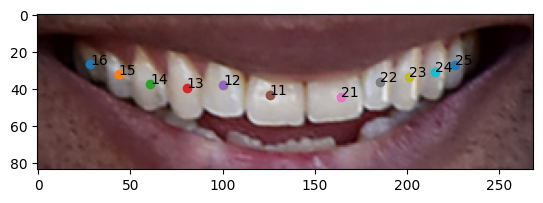

In [2]:
import matplotlib.pyplot as plt
import io
import cv2
import numpy as np 


for path in all_path:
    fig=cv2.imread(path)
    jpath=path.split('.')
    jpath[-1]='json'
    with open('.'.join(jpath)) as f:
        data=json.load(f)
    print(data)
    plt.imshow(cv2.cvtColor(fig,cv2.COLOR_RGB2BGR))
    for i in range(len(data['mask'])):
        mask=np.array(data['mask'][i])
        if data['label'][i]!=-1:
            plt.text(np.mean(mask[:,0]), np.mean(mask[:,1]), data['label'][i])
            plt.scatter(np.mean(mask[:,0]), np.mean(mask[:,1]))

    break



In [ ]:
from lib.SMILE import SMILE


In [ ]:

from lib.SMILE import SMILE
import numpy as np
import json
from tqdm import tqdm, trange
now=1

times = 0
progress = tqdm(total=len(all_path))

for f in all_path:
    smile=SMILE(f,"")
    filename=str(now).zfill(4)
    smile.find_all_tooth()
    cv2.imwrite(f"{output_path}{filename}.png", smile.boximg)


    #plt.imshow(cv2.cvtColor(smile.boximg,cv2.COLOR_RGB2BGR))
    #plt.axis('on')
    #plt.savefig(f"mask/{filename}.png",bbox_inches='tight',pad_inches=0.0)
    with open(f"{output_path}{filename}.json", 'w') as  f:
        json.dump([p.tolist() for p in smile.tooth.polygons], f)
    now+=1
    progress.update(1)




In [ ]:
import numpy as np
import json
from tqdm import tqdm, trange
id=1

with open(f"{output_path}{str(id).zfill(4)}.json") as f:
    tooth = json.load(f)
fig=cv2.imread(f"{output_path}{str(id).zfill(4)}.png")

for teeth in tooth:
    teeth=np.array(teeth)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(fig,cv2.COLOR_RGB2BGR))
    plt.fill(teeth[:,0],teeth[:,1])
    plt.show()


In [ ]:
str(id).zfill(4)